In [1]:
!pip install yfinance
!pip install yahoofinancials

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, r2_score


[*********************100%***********************]  1 of 1 completed


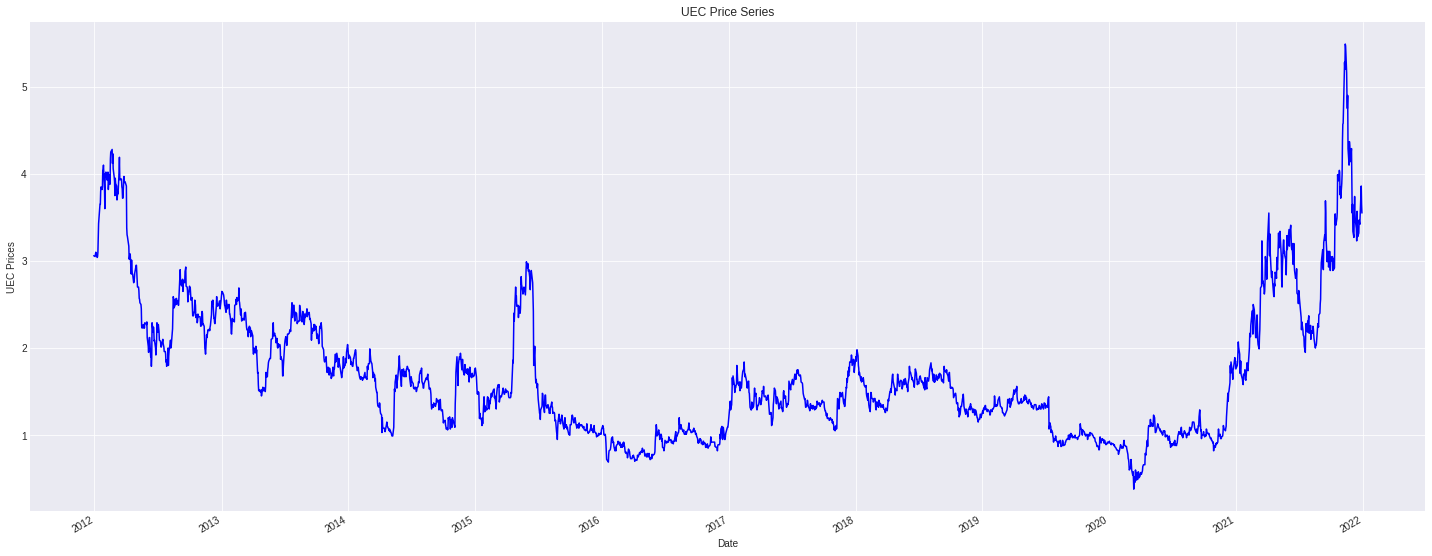

In [3]:
Df = yf.download('UEC', '2011-12-30', '2021-12-30', auto_adjust=True)
Df = Df.dropna()

Df.Close.plot(figsize=(25,10),color='b')
plt.ylabel("UEC Prices")
plt.title("UEC Price Series")
plt.show()

In [4]:
Df['OHLC_Price'] = (Df['Close'] + Df['Low'] + Df['High']+ Df['Open'])/4
Df['Average_Price'] = (Df['Low'] + Df['High'])/2
Df['Range'] = Df['High'] - Df['Low']

Df['std'] = Df['Close'].rolling(window=20).std(ddof=0) 
Df['MA'] = Df['Close'].rolling(window=20).mean()
Df['BB_Up'] = Df['MA'] + 2*Df['std']
Df['BB_Down'] = Df['MA'] - 2*Df['std'] 
Df.head(25)

,Open,High,Low,Close,Volume,OHLC_Price,Average_Price,Range,std,MA,BB_Up,BB_Down
Date,,,,,,,,,,,,
2011-12-30,2.95,3.06,2.89,3.06,377800,2.9900,2.975,0.17,NaN,NaN,NaN,NaN
2012-01-03,3.09,3.10,3.02,3.05,553500,3.0650,3.060,0.08,NaN,NaN,NaN,NaN
2012-01-04,3.02,3.10,3.01,3.08,371400,3.0525,3.055,0.09,NaN,NaN,NaN,NaN
2012-01-05,3.07,3.10,3.02,3.10,168900,3.0725,3.060,0.08,NaN,NaN,NaN,NaN
2012-01-06,3.12,3.13,3.06,3.08,223500,3.0975,3.095,0.07,NaN,NaN,NaN,NaN
2012-01-09,3.08,3.09,3.01,3.04,538800,3.0550,3.050,0.08,NaN,NaN,NaN,NaN
2012-01-10,2.97,3.09,2.97,3.05,288800,3.0200,3.030,0.12,NaN,NaN,NaN,NaN
2012-01-11,3.03,3.10,3.02,3.10,382800,3.0625,3.060,0.08,NaN,NaN,NaN,NaN
2012-01-12,3.12,3.29,3.11,3.27,635000,3.1975,3.200,0.18,NaN,NaN,NaN,NaN


In [5]:
Df = Df[['Close']]

In [6]:
Df['MA_3'] = Df['Close'].rolling(window=3).mean()
Df['MA_9'] = Df['Close'].rolling(window=9).mean()
Df['NEXT_DAY_PRICE'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['MA_3', 'MA_9']]

y = Df['NEXT_DAY_PRICE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [7]:
t = .8
t = int(t*len(Df))

X_train = X[:t]
y_train = y[:t]

X_test = X[t:]
y_test = y[t:]

In [8]:
linear = LinearRegression().fit(X_train, y_train)


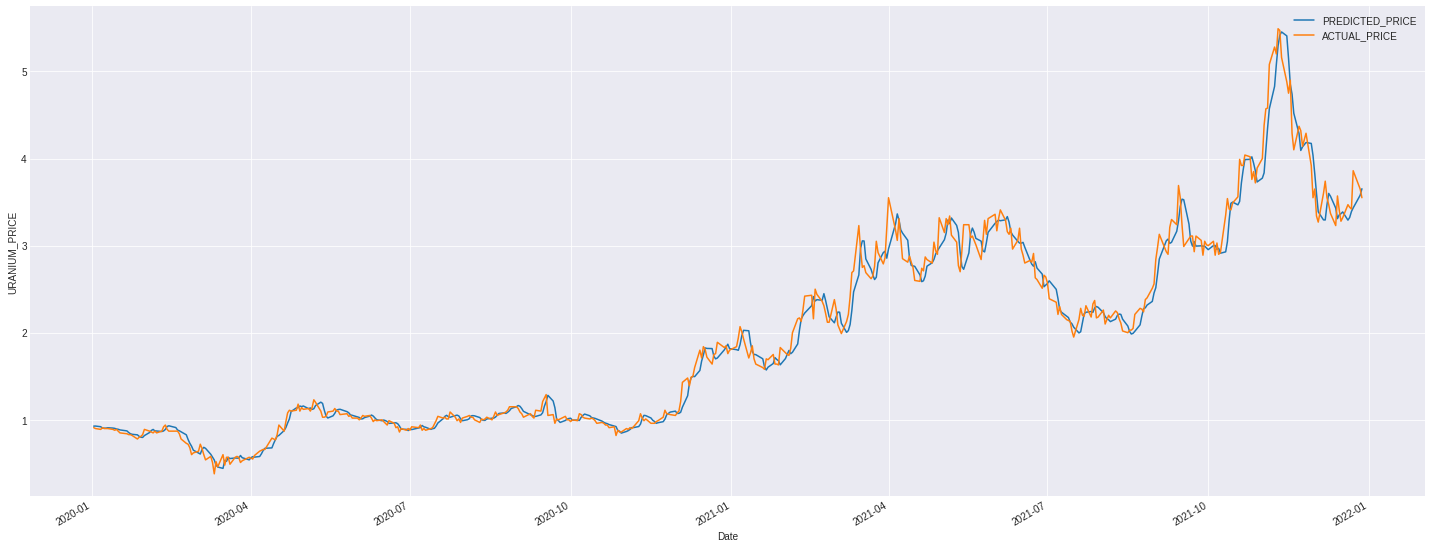

In [9]:
PREDICTED_PRICE = linear.predict(X_test)
PREDICTED_PRICE = pd.DataFrame(
    PREDICTED_PRICE, index=y_test.index, columns=['PRICE'])
PREDICTED_PRICE.plot(figsize=(25,10))
y_test.plot()
plt.legend(['PREDICTED_PRICE', 'ACTUAL_PRICE'])
plt.ylabel("URANIUM_PRICE")
plt.show()

In [10]:
print("Mean Absolute Error:", mean_absolute_error(y_test, PREDICTED_PRICE))
print("Coefficient of Determination:", r2_score(y_test, PREDICTED_PRICE))

Mean Absolute Error: 0.09737688374415376
Coefficient of Determination: 0.9826163447397742
